In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv('store_customer_purchase.csv')
df.head()

,Order_ID,Customer_ID,Gender,Age,City,Product_Category,Price,Time_Spent,Payment_Method,Past_Purchases,Discount_Available,Order_Date,Will_Buy
0,NaN,8043,Male,56,Cairo,Sports,1679.53,399,UPI,13,0,2025-05-10,0
1,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2816,Female,46,Giza,Sports,4068.38,52,PayPal,14,1,2025-09-23,0
2,23b8c1e9-3924-46de-beb1-3b9046685257,5640,Female,32,Aswan,Electronics,1347.74,263,Cash,3,0,2025-09-08,0
3,bd9c66b3-ad3c-4d6d-9a3d-1fa7bc8960a9,8972,Male,60,Aswan,Home,3439.36,139,UPI,12,0,2025-07-21,0
4,NaN,9633,Female,25,Mansoura,Toys,3825.12,69,PayPal,10,0,2025-09-15,0


In [3]:
df=df.drop(['Order_ID','Customer_ID'],axis=1)
df['Order_Date']=pd.to_datetime(df['Order_Date'])

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Gender              1000 non-null   object        
 1   Age                 1000 non-null   int64         
 2   City                1000 non-null   object        
 3   Product_Category    1000 non-null   object        
 4   Price               1000 non-null   float64       
 5   Time_Spent          1000 non-null   int64         
 6   Payment_Method      1000 non-null   object        
 7   Past_Purchases      1000 non-null   int64         
 8   Discount_Available  1000 non-null   int64         
 9   Order_Date          1000 non-null   datetime64[ns]
 10  Will_Buy            1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 86.1+ KB


,Gender,Age,City,Product_Category,Price,Time_Spent,Payment_Method,Past_Purchases,Discount_Available,Order_Date,Will_Buy
0,Male,56,Cairo,Sports,1679.53,399,UPI,13,0,2025-05-10,0
1,Female,46,Giza,Sports,4068.38,52,PayPal,14,1,2025-09-23,0
2,Female,32,Aswan,Electronics,1347.74,263,Cash,3,0,2025-09-08,0
3,Male,60,Aswan,Home,3439.36,139,UPI,12,0,2025-07-21,0
4,Female,25,Mansoura,Toys,3825.12,69,PayPal,10,0,2025-09-15,0


In [5]:
df['Will_Buy'].value_counts()

Will_Buy
0    673
1    327
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

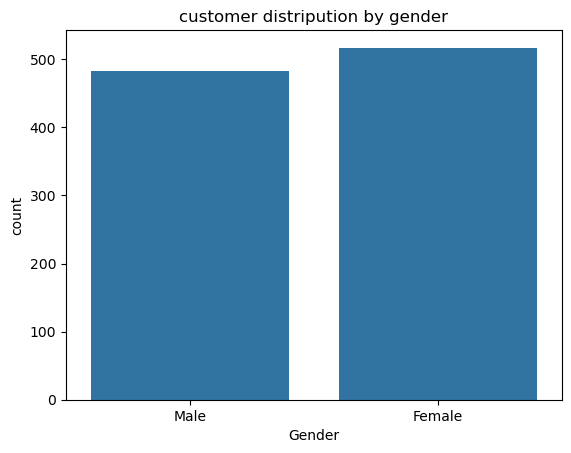

In [6]:
sns.countplot(data=df , x='Gender')
plt.title('customer distripution by gender')
plt.show

Text(0.5, 1.0, 'orders for each city')

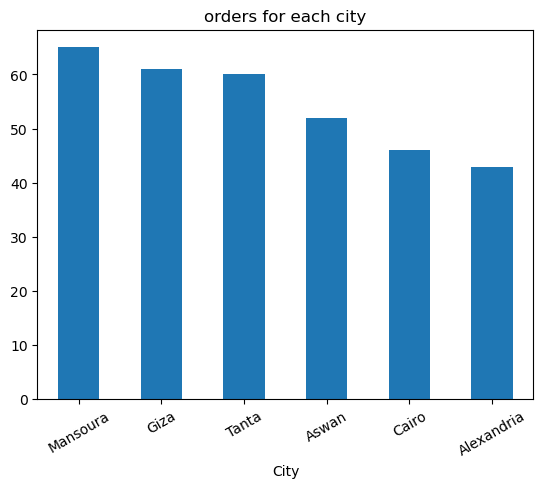

In [7]:
sales_by_city=df.groupby('City')['Will_Buy'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=30)
plt.title('orders for each city')

<Axes: title={'center': 'most purchased category'}, xlabel='Product_Category'>

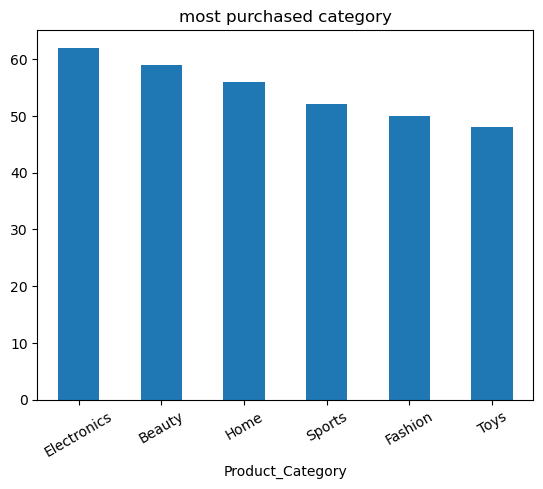

In [8]:
sales_by_cat=df.groupby('Product_Category')['Will_Buy'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('most purchased category')
plt.xticks(rotation=30)
sales_by_cat

In [9]:
df['month']=df['Order_Date'].dt.month
df['year']=df['Order_Date'].dt.year

<Axes: title={'center': 'sales by month'}, xlabel='month'>

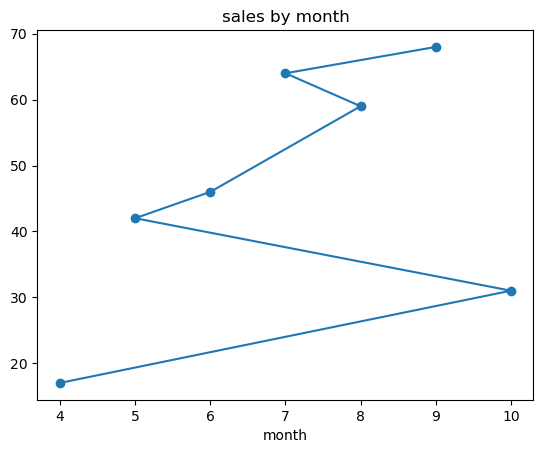

In [10]:
sales_by_month=df.groupby('month')['Will_Buy'].sum().sort_values(ascending=False).plot(kind='line', marker='o')
plt.xticks(rotation=0)
plt.title('sales by month')
sales_by_month

Text(0.5, 1.0, 'effect of discount on purchase')

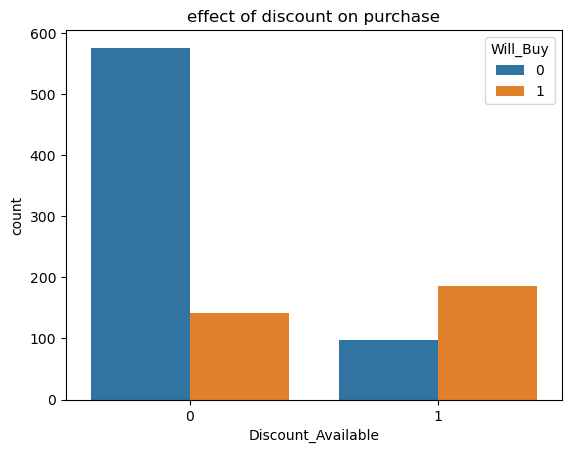

In [11]:
sns.countplot(data=df , x='Discount_Available', hue='Will_Buy')
plt.title('effect of discount on purchase')

Text(0.5, 1.0, 'Most Popular Payment Methods for Completed Orders')

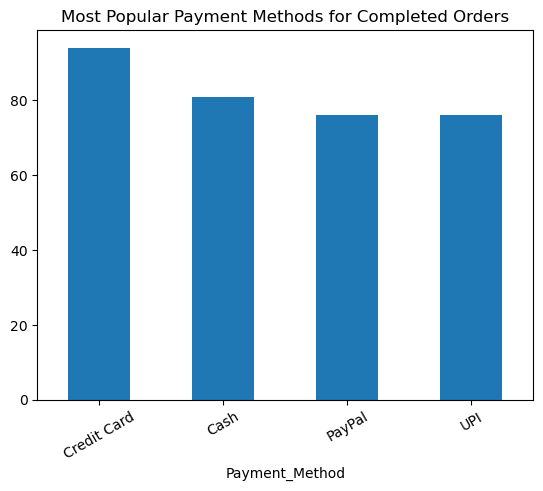

In [44]:
df.groupby('Payment_Method')['Will_Buy'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=30)
plt.title('Most Popular Payment Methods for Completed Orders')

Text(0.5, 1.0, 'correlation between variables')

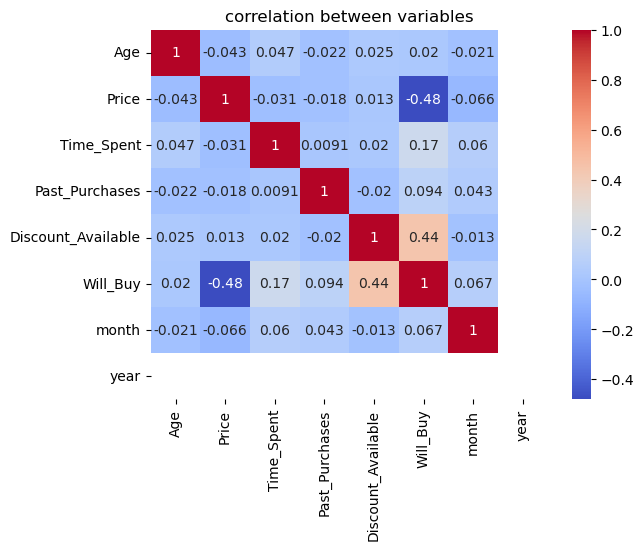

In [12]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('correlation between variables')

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report , ConfusionMatrixDisplay ,confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
x=df[['Age','Price','Time_Spent', 'Past_Purchases','Discount_Available']]
y=df['Will_Buy']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.8,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train, test_size=0.2,random_state=42)

In [16]:
scal=StandardScaler()
x_trian_scal=scal.fit_transform(x_train)
x_valid_scal=scal.transform(x_valid)
x_test_scal=scal.transform(x_test)

In [17]:
ros=RandomOverSampler()
x_train_fin, y_train_fin=ros.fit_resample(x_trian_scal, y_train)

In [18]:
model=LogisticRegression()
model.fit(x_train_fin,y_train_fin)

LogisticRegression()

In [19]:
ypred=model.predict(x_valid_scal)

In [20]:
print(classification_report(y_valid,ypred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90       109
           1       0.73      0.92      0.82        51

    accuracy                           0.87       160
   macro avg       0.85      0.88      0.86       160
weighted avg       0.89      0.87      0.87       160



In [26]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_fin,y_train_fin)

KNeighborsClassifier(n_neighbors=3)

In [27]:
ypred=knn_model.predict(x_valid_scal)
print(classification_report(y_valid,ypred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       109
           1       0.83      0.88      0.86        51

    accuracy                           0.91       160
   macro avg       0.89      0.90      0.89       160
weighted avg       0.91      0.91      0.91       160



In [32]:
acc=metrics.accuracy_score(y_valid,ypred)
print('accuracy of the model: ',acc)

accuracy of the model:  0.90625


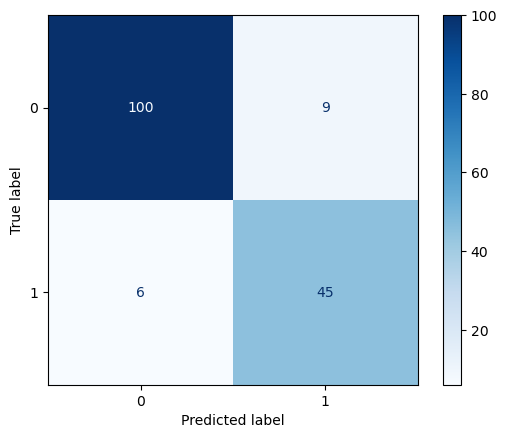

In [28]:
cm=confusion_matrix(y_valid, ypred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [29]:
df['month_byname']=df['Order_Date'].dt.month_name()
df

,Gender,Age,City,Product_Category,Price,Time_Spent,Payment_Method,Past_Purchases,Discount_Available,Order_Date,Will_Buy,month,year,month_byname
0,Male,56,Cairo,Sports,1679.53,399,UPI,13,0,2025-05-10,0,5,2025,May
1,Female,46,Giza,Sports,4068.38,52,PayPal,14,1,2025-09-23,0,9,2025,September
2,Female,32,Aswan,Electronics,1347.74,263,Cash,3,0,2025-09-08,0,9,2025,September
3,Male,60,Aswan,Home,3439.36,139,UPI,12,0,2025-07-21,0,7,2025,July
4,Female,25,Mansoura,Toys,3825.12,69,PayPal,10,0,2025-09-15,0,9,2025,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Female,22,Alexandria,Electronics,2219.24,187,Cash,4,0,2025-05-07,0,5,2025,May
996,Male,40,Cairo,Electronics,1627.90,421,Credit Card,10,1,2025-10-12,1,10,2025,October
997,Male,27,Mansoura,Home,2580.10,62,Cash,1,0,2025-05-10,0,5,2025,May
998,Female,61,Cairo,Home,2253.61,417,Cash,7,0,2025-05-18,0,5,2025,May


In [153]:
df.to_csv('cleaned_techwave_data.csv',index=False)